In [3]:
import sklearn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import cv2

import os

In [ ]:
#https://www.kaggle.com/joosthazelzet/lego-brick-images

In [11]:
DATASET_PATH='LEGO/'

In [14]:
def load_images(path):
    images_train = []
    labels_train = []
    
    for sub_folder in os.listdir(path):
        fullpath = os.path.join(path, sub_folder)
        print(fullpath)
        
        if not os.path.isdir(fullpath):
            continue
            
        images = os.listdir(fullpath)
        
        for image_filename in images:
            image_fullpath = os.path.join(fullpath, image_filename)
            
            if os.path.isdir(image_fullpath):
                continue
                
            img = cv2.imread(image_fullpath)
            
            images_train.append(img)
            labels_train.append(sub_folder)
            
    return np.array(images_train), np.array(labels_train)

In [15]:
images_train, labels_train =load_images(DATASET_PATH)

LEGO/11214 Bush 3M friction with Cross axle
LEGO/18651 Cross Axle 2M with Snap friction
LEGO/2357 Brick corner 1x2x2
LEGO/3003 Brick 2x2
LEGO/3004 Brick 1x2
LEGO/3005 Brick 1x1
LEGO/3022 Plate 2x2
LEGO/3023 Plate 1x2
LEGO/3024 Plate 1x1
LEGO/3040 Roof Tile 1x2x45deg
LEGO/3069 Flat Tile 1x2
LEGO/32123 half Bush
LEGO/3673 Peg 2M
LEGO/3713 Bush for Cross Axle
LEGO/3794 Plate 1X2 with 1 Knob
LEGO/6632 Technic Lever 3M


In [16]:
images_train.shape

(6379, 200, 200, 3)

In [17]:
images_train[0].shape

(200, 200, 3)

In [18]:
labels_train.shape

(6379,)

Label: 11214 Bush 3M friction with Cross axle


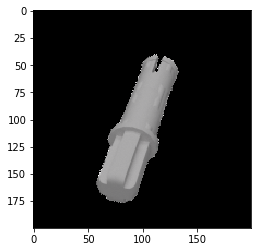

In [20]:
plt.imshow(images_train[10])

print('Label:', labels_train[10])

Label: 11214 Bush 3M friction with Cross axle


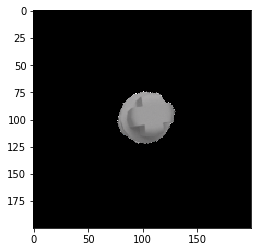

In [22]:
plt.imshow(images_train[111])

print('Label:', labels_train[111])

In [24]:
X = images_train.reshape(images_train.shape[0],
                        images_train.shape[1] * images_train.shape[2] * images_train.shape[3])

In [25]:
X.shape

(6379, 120000)

In [27]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

Y = encoder.fit_transform(labels_train)

In [28]:
np.unique(Y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
      dtype=int64)

In [29]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, shuffle=True, test_size=0.2)

x_train.shape, y_train.shape

((5103, 120000), (5103,))

In [30]:
x_test.shape, y_test.shape

((1276, 120000), (1276,))

In [31]:
from sklearn.neural_network import MLPClassifier

In [32]:
clf_image = MLPClassifier(activation = 'relu',
                         hidden_layer_sizes=(100,100,100),
                         solver='adam',
                         verbose=True,
                         max_iter=100)

In [33]:
clf_image.fit(x_train, y_train)

Iteration 1, loss = inf
Iteration 2, loss = 32.13637579
Iteration 3, loss = 9.14269286
Iteration 4, loss = 4.64040513
Iteration 5, loss = 5.17233803
Iteration 6, loss = 7.03526971
Iteration 7, loss = 8.14814021
Iteration 8, loss = 5.04309911
Iteration 9, loss = 2.81420326
Iteration 10, loss = 1.50836345
Iteration 11, loss = 1.31449096
Iteration 12, loss = 1.70399081
Iteration 13, loss = 1.18921774
Iteration 14, loss = 3.01107193
Iteration 15, loss = 2.68207263
Iteration 16, loss = 1.63813523
Iteration 17, loss = 1.41563654
Iteration 18, loss = 1.03006017
Iteration 19, loss = 0.93512713
Iteration 20, loss = 1.67544696
Iteration 21, loss = 2.35170245
Iteration 22, loss = 1.08061979
Iteration 23, loss = 0.98469542
Iteration 24, loss = 0.70802773
Iteration 25, loss = 1.24321804
Iteration 26, loss = 1.10599937
Iteration 27, loss = 0.83950338
Iteration 28, loss = 0.63600322
Iteration 29, loss = 1.73959851
Iteration 30, loss = 2.79117176
Iteration 31, loss = 2.79576962
Iteration 32, loss = 6.

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 100, 100), learning_rate='constant',
              learning_rate_init=0.001, max_iter=100, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=True, warm_start=False)

In [34]:
y_pred = clf_image.predict(x_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8330721003134797